# Nettoyage des données

In [6]:
# Import des bibliothèques

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import du dataset

df = pd.read_csv('dataset/housing_data_italy_august2022.csv')

## Suppressions des colonnes inutiles


Nous avons précédemment identifié certaines colonnes qui n'apportent aucune information utile :
- id
- timestamp

Nous avons identifié des colonnes qui contiennent toutes la même information et sont donc inutiles :
- availability
- status

Nous avons identifié des colonnes dont les données ne sont pas exploitables :
- title

Nous conserverons la colonne heating comme catégorie binaire

In [3]:
print(f"Colonnes initiales : {df.columns} ")

useless_columns = [
    'id',
    'timestamp',
    'title',
    'availability',
    'status'
]

df.drop(columns=useless_columns, inplace=True)

print(f"Colonnes après suppression : {df.columns} ")

Colonnes initiales : Index(['id', 'timestamp', 'location', 'title', 'price', 'n_rooms', 'floor',
       'mq', 'n_bathrooms', 'year_of_construction', 'availability',
       'energy_class', 'status', 'heating', 'has_garage', 'has_terrace',
       'has_garden', 'has_balcony', 'has_fireplace', 'has_alarm',
       'has_air_conditioning', 'has_pool', 'has_parking', 'has_elevator',
       'is_furnished'],
      dtype='object') 
Colonnes après suppression : Index(['location', 'price', 'n_rooms', 'floor', 'mq', 'n_bathrooms',
       'year_of_construction', 'energy_class', 'heating', 'has_garage',
       'has_terrace', 'has_garden', 'has_balcony', 'has_fireplace',
       'has_alarm', 'has_air_conditioning', 'has_pool', 'has_parking',
       'has_elevator', 'is_furnished'],
      dtype='object') 


## Gestion des valeurs manquantes

Rappel des colonnes avec valeurs manquantes :

### > de 50% de valuers manquantes
Aucune

### Entre 20% et 50% de valeurs manquantes
- floor : 151044 données présentes (67.61%)
- n_rooms : 163086 données présentes (73.00%)

Nous avons ici des données avec un manque important.
- Dans le cas de l'étage 'floor', un tiers des données sont manquantes. Nous avons également vu que la distribution pouvait poser problème. En effet, si trois quarts des données sont 1 et 2, le maximum est au-delà de 50. De plus, en terme d'influence, si l'on peut considérer généralement une moins-value pour les logements au rez de chaussée, la différence entre étage supérieure est quasi nulle. Ainsi, la variation n'est pas linéaire (au sens ou la différence entre l'étage 1 et 2 et beaucoup plus importante qu'entre les étage 4 et 7 par exemple. Nous choisirons donc de supprimer cette colonne.
- Le cas du nombre de pièce sera traité différemment car il nous semble particulièrement important (même si il peut être légèrement redondant avec la surface en m2). Nous choisirons donc une imputation des valeurs manquantes.

### < 20% de valeurs manquantes
- Price : 184293 données présentes (82.49%)
- n_bathrooms : 209012 données présentes (93.56%)
- mq : 219375 données présentes (98.19%)
- energy_class : 222730 données présentes (99.70%)
- year_of_construction : 223399 données présentes (100.00%)

Dans les cas de 'n_bathrooms', 'mq', 'energy_class', 'year_of_construction', les valeurs manquantes étant peu nombreuses, nous choisirons systématiquement l'imputation des valeurs manquantes.

En revanche, la variable 'price' étant la valeur cible (label "y") et son taux de valeurs manquantes approchant les 20 %, nous comparerons 2 approches :
- l'une consistera à supprimer les lignes dont le prix est manquant (approche qualitative : moins de données mais tous les prix sont réels)
- l'autre consistera à imputer des valeurs synthétiques aux valeurs manquantes (approche plus quantitative : plus de données mais certaines valeurs sont synthétiques)



In [4]:
deleted_column = [
    'floor'
]

df.drop(columns=deleted_column, inplace=True)

print(f"Colonnes après suppression : {df.columns} ")

Colonnes après suppression : Index(['location', 'price', 'n_rooms', 'mq', 'n_bathrooms',
       'year_of_construction', 'energy_class', 'heating', 'has_garage',
       'has_terrace', 'has_garden', 'has_balcony', 'has_fireplace',
       'has_alarm', 'has_air_conditioning', 'has_pool', 'has_parking',
       'has_elevator', 'is_furnished'],
      dtype='object') 


In [5]:
# Copie d'un dataframe avec seulement les lignes ayant un prix
df_small = df[df['price'].notna()].copy()

# Affichage du nombre de lignes dans chaque DataFrame
print(f"Nombre de lignes dans le DataFrame original       : {len(df)}")
print(f"Nombre de lignes sans valeurs manquantes pour 'price' : {len(df_small)}")

Nombre de lignes dans le DataFrame original       : 223409
Nombre de lignes sans valeurs manquantes pour 'price' : 184293


On va refaire la matrice de corrélation avec les lignes restantes :


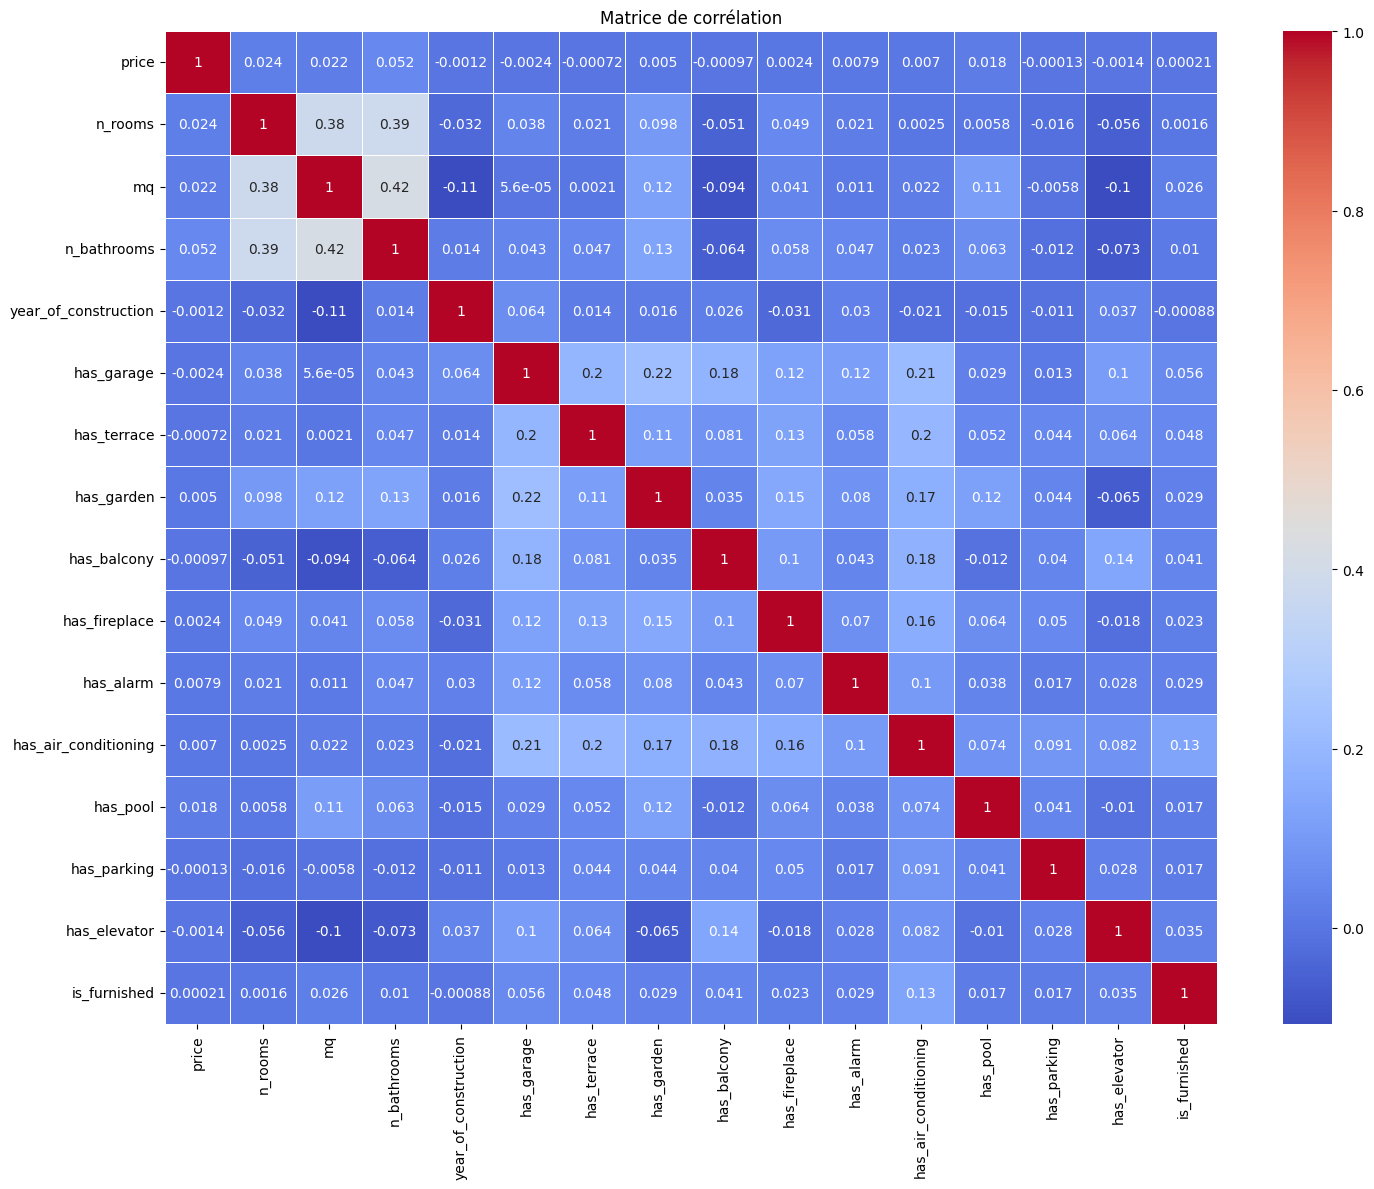

In [9]:
# Sélection des colonnes numériques uniquement
numeric_df = df.select_dtypes(include=['number'])

# Calcul de la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Affichage avec seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.savefig('output/correlation_matrix.png')
plt.show()
plt.close()